## The purpose of this project is to classify the given dataset using Decision Tree Classifier algorithm and to visualize it graphically 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

In [14]:
# Reading the given dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Since Id column is not required. So removing it from dataframe
df.drop(columns = "Id", inplace = True)

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.Species = df.Species.replace({"Iris-setosa" : 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [18]:
# Separating independent and dependent variables
X = df.drop(columns ="Species").values
y = df.Species

In [28]:
df.drop(columns = "Species").columns.tolist()

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [19]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

### Using Decision Tree algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

print("Decision Tree classifier created")

Decision Tree classifier created


### Visualizing Decision Tree classifier

In [23]:
# Installing required libraries
!pip install pydotplus
!pip install graphviz

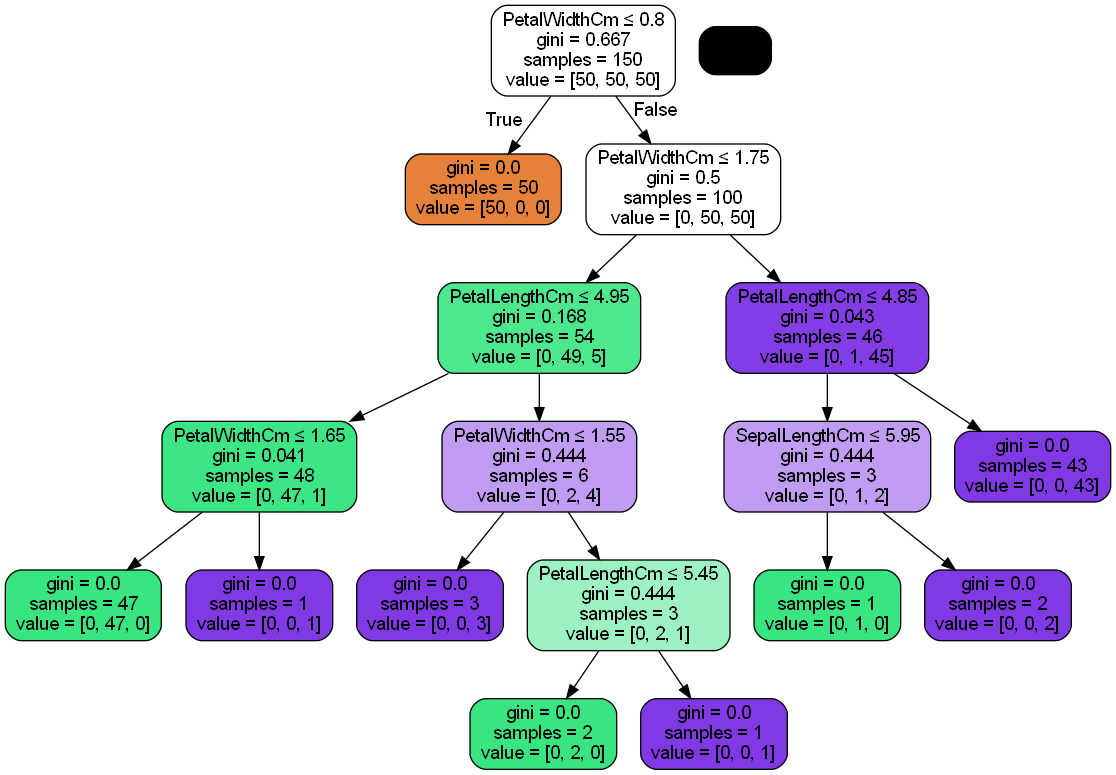

In [35]:
# Importing necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualizing the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names= df.drop(columns = "Species").columns.tolist(),  
                filled= True, rounded= True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())